In [2]:
import os 
import zipfile 
import pandas as pd
import os
import numpy as np
import cv2
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
import keras
from keras.layers import Conv2D,Activation,MaxPooling2D
#import keras_utils
from keras.layers import Concatenate
from keras import Input
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import models
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix,  plot_confusion_matrix,  ConfusionMatrixDisplay
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
data_path='/content/drive/MyDrive/covid-end'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

In [3]:
data=np.load('/content/drive/MyDrive/data/data1.npy')
target=np.load('/content/drive/MyDrive/data/target1.npy')
print(data.shape)
print(target.shape)

(21759, 100, 100, 1)
(21759, 2)


In [4]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)
print('train_data' , train_data.shape)
print('test_data' , test_data.shape)
print('train_data' , train_target.shape)
print('test_data' , test_target.shape)

train_data (17407, 100, 100, 1)
test_data (4352, 100, 100, 1)
train_data (17407, 2)
test_data (4352, 2)


In [ ]:
input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
print(input_shape,inp)

(100, 100, 1) KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
from tensorflow.keras.applications import ResNet50
 
base_model = ResNet50(input_shape=(100, 100,1), include_top=False, weights=None)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
 
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights=None, pooling='max' ,input_shape=(100,100,1)))
base_model.add(Dense(2, activation='sigmoid'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23581440  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,585,538
Trainable params: 23,532,418
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
filepath="/content/drive/MyDrive/ResNet/Res-3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=base_model.fit(train_data,train_target,epochs=3,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/3
436/436 [==============================] - 3099s 7s/step - loss: 0.8386 - acc: 0.5556 - val_loss: 1.0662 - val_acc: 0.5775

Epoch 00001: val_acc improved from -inf to 0.57754, saving model to /content/drive/MyDrive/ResNet/Res-3.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/3
436/436 [==============================] - 3100s 7s/step - loss: 0.7560 - acc: 0.6313 - val_loss: 1.3541 - val_acc: 0.5951

Epoch 00002: val_acc improved from 0.57754 to 0.59506, saving model to /content/drive/MyDrive/ResNet/Res-3.hdf5
Epoch 3/3
436/436 [==============================] - 3087s 7s/step - loss: 0.6963 - acc: 0.6886 - val_loss: 0.8155 - val_acc: 0.7157

Epoch 00003: val_acc improved from 0.59506 to 0.71568, saving model to /content/drive/MyDrive/ResNet/Res-3.hdf5


In [ ]:
base_model.save("/content/drive/MyDrive/ResNet/Res-3.hdf5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


In [ ]:
filepath="/content/drive/MyDrive/data/res5.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=base_model.fit(train_data,train_target,epochs=3,callbacks=[checkpoint],validation_split=0.2)


In [ ]:
base_model.save("/content/drive/MyDrive/data/vgg-16-5.hdf5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


In [7]:
new_model = load_model("/content/drive/MyDrive/ResNet/Res-95.hdf5")

In [8]:
filepath="/content/drive/MyDrive/ResNet/Res-100.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=new_model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
436/436 [==============================] - 2814s 6s/step - loss: 0.0646 - acc: 0.9809 - val_loss: 0.0384 - val_acc: 0.9891

Epoch 00001: acc improved from -inf to 0.98090, saving model to /content/drive/MyDrive/ResNet/Res-100.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
436/436 [==============================] - 2784s 6s/step - loss: 0.0600 - acc: 0.9813 - val_loss: 0.0353 - val_acc: 0.9917

Epoch 00002: acc improved from 0.98090 to 0.98126, saving model to /content/drive/MyDrive/ResNet/Res-100.hdf5
Epoch 3/5
436/436 [==============================] - 2799s 6s/step - loss: 0.0534 - acc: 0.9849 - val_loss: 0.0482 - val_acc: 0.9854

Epoch 00003: acc improved from 0.98126 to 0.98492, saving model to /content/drive/MyDrive/ResNet/Res-100.hdf5
Epoch 4/5
436/436 [==============================] - 2816s 6s/step - loss: 0.0551 - acc: 0.9833 - val_loss: 0.0512 - val_acc: 0.9862

Epoch 00004: acc did not improve from 0.98492
Epoch 5/5
436/436 [==============================] - 2789s 6s/step - loss: 0.0517 - acc: 0.9846 - val_loss: 0.0389 - val_acc: 0.9891

Epoch 00005: acc did not improve from 0.98492


In [ ]:
new_model.save("/content/drive/MyDrive/ResNet/Res-100.hdf5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk


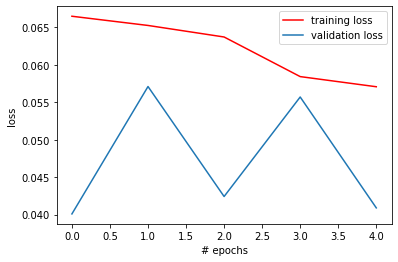

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

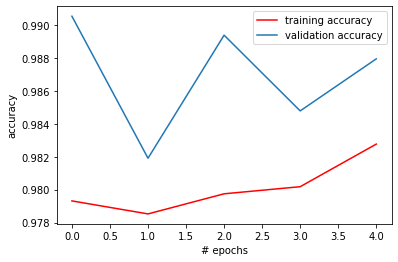

In [ ]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred = new_model.predict_generator(test_data) 
y_pred = np.argmax(Y_pred,  axis =1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
0.0
4352
4352
[[1442  629]
 [ 320 1961]]
 1.0
4352
4352
[[1782  366]
 [ 427 1777]]
 
 
 
 0.0
4352
4352
[[1680  390]
 [ 141 2141]]
 
 
 0.0
4352
4352
[[1897  272]
 [ 172 2011]]
 
 
 
 0.0
4352
4352
[[1991  178]
 [ 195 1988]]
Classification_Report
 
 
 
0.0
4352
4352
[[1931  176]
 [ 109 2136]]
 
 
 1.0
4352
4352
[[2016  105]
 [ 138 2093]]
Classification_Report
 
 
 
0.0
4352
4352
[[1980   99]
 [  96 2177]]
Classification_Report
 
 
 
0.0
4352
4352
[[2020   91]
 [  67 2174]]
Classification_Report
 
 
 
 
1.0
4352
4352
[[2042   71]
 [  96 2143]]
Classification_Report
 
 
 
0.0
4352
4352
[[2044   69]
 [  71 2168]]
Classification_Report
 
 
 
 
 
1.0
4352
4352
[[2046   61]
 [  42 2203]]
Classification_Report
 
 
 
 
 
 
1.0
4352
4352
[[2096   40]
 [  47 2169]]
Classification_Report
 
 
 
 
 
 
0.0
4352
4352
[[2084   18]
 [  37 2213]]
Classification_Report








0.0
4352
4352
[[2077   32]
 [  20 2223]]
Classification_Report

0.0
4352
4352
[[2077   32]
 [  20 2223]]
Classification_Report
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99      2109
         pos       0.99      0.99      0.99      2243

    accuracy                           0.99      4352
   macro avg       0.99      0.99      0.99      4352
weighted avg       0.99      0.99      0.99      4352



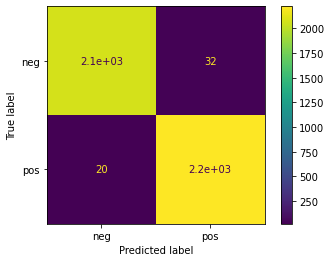

In [ ]:
 #print(type(y_pred))
true_lables=[]
target_names = ['neg', 'pos']
label_names = [0 , 1]
print(test_target[0][0])
print(len(test_target))
for item in range(len(test_target)):
  true_lables.append(test_target[item][1])
print(len(true_lables))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_lables,  y_pred,  labels = label_names) 
 
# print ('Confusion Matrix') 
print(confusion_matrix(true_lables,  y_pred))
 
print('Classification_Report') 
print(classification_report(true_lables,  y_pred, target_names = target_names)) 
 
disp = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels = target_names)
disk = disp.plot() 
plt.show()